## Preambule

In [30]:
import numpy as np
import matplotlib.pyplot as plt

## Deterministic case (three variables)

In [112]:
def model(sample):
    x1, x2, x3 = sample
    noise = np.random.normal(0, 1e-9)
    return 1*x1 + 1*x2 + 0*x3 + 3*x1*x3

In [113]:
s1s = []
s2s = []
s3s = []
s12s = []
s13s = []
s23s = []
sums_total = []
ns = np.logspace(2, 5.5, 200)
for n in ns:
    n = int(n)
    sample1 = np.random.random(size=(3, n))
    sample2 = np.random.random(size=(3, n))
    m1 = model(sample1)
    m2 = model(sample2)

    n1 = model((sample1[0], sample2[1], sample2[2]))
    n2 = model((sample2[0], sample1[1], sample2[2]))
    n3 = model((sample2[0], sample2[1], sample1[2]))

    n12 = model((sample1[0], sample1[1], sample2[2]))
    n13 = model((sample1[0], sample2[1], sample1[2]))
    n23 = model((sample2[0], sample1[1], sample1[2]))

    s1s.append((1/(n-1)*np.dot(m1, n1) - 1/n*np.dot(m1, m2))/np.var(m1))
    s2s.append((1/(n-1)*np.dot(m1, n2) - 1/n*np.dot(m1, m2))/np.var(m1))
    s3s.append((1/(n-1)*np.dot(m1, n3) - 1/n*np.dot(m1, m2))/np.var(m1))
    s12s.append((1/(n-1)*np.dot(m1, n12) - 1/n*np.dot(m1, m2))/np.var(m1)-s1s[-1]-s2s[-1])
    s13s.append((1/(n-1)*np.dot(m1, n13) - 1/n*np.dot(m1, m2))/np.var(m1)-s1s[-1]-s3s[-1])
    s23s.append((1/(n-1)*np.dot(m1, n23) - 1/n*np.dot(m1, m2))/np.var(m1)-s2s[-1]-s3s[-1])
    sums_total.append(s1s[-1]+s2s[-1]+s3s[-1]+s12s[-1]+s13s[-1]+s23s[-1])

(-0.1, 1.1)

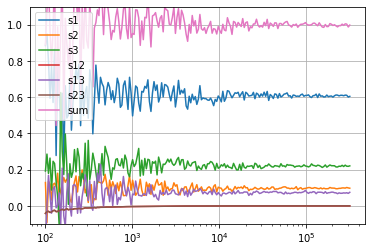

In [114]:
plt.semilogx(ns, s1s, label='s1')
plt.semilogx(ns, s2s, label='s2')
plt.semilogx(ns, s3s, label='s3')
plt.semilogx(ns, s12s, label='s12')
plt.semilogx(ns, s13s, label='s13')
plt.semilogx(ns, s23s, label='s23')
plt.semilogx(ns, sums_total, label='sum')
plt.legend()
plt.grid()
plt.ylim([-0.1, 1.1])

## Stochastic case (two variables + noise)

In [137]:
def model(sample):
    x1, x2 = sample
    noise = np.random.normal(0.1, 0.2, size=(len(x1)))
    return 1*x1 + 2*x2 + 3*x1*x2 + noise + noise*x1

In [148]:
s1sM = []
s2sM = []
s12sM = []
sums_totalM = []
for _ in range(5):
    s1s = []
    s2s = []
    s12s = []
    sums_total = []
    ns = np.logspace(2, 5, 200)
    for n in ns:
        n = int(n)
        sample1 = np.random.random(size=(2, n))
        sample2 = np.random.random(size=(2, n))
        m1 = model(sample1)
        m2 = model(sample2)

        n1 = model((sample1[0], sample2[1]))
        n2 = model((sample2[0], sample1[1]))

        n12 = model((sample1[0], sample1[1]))

        s1s.append((1/(n-1)*np.dot(m1, n1) - 1/n*np.dot(m1, m2))/np.var(m1))
        s2s.append((1/(n-1)*np.dot(m1, n2) - 1/n*np.dot(m1, m2))/np.var(m1))
        s12s.append((1/(n-1)*np.dot(m1, n12) - 1/n*np.dot(m1, m2))/np.var(m1)-s1s[-1]-s2s[-1])
        sums_total.append(s1s[-1]+s2s[-1]+s12s[-1])
    s1sM.append(s1s)
    s2sM.append(s2s)
    s12sM.append(s12s)
    sums_totalM.append(sums_total)
s1sM = np.mean(s1sM, axis=0)
s2sM = np.mean(s2sM, axis=0)
s12sM = np.mean(s12sM, axis=0)
sums_totalM = np.mean(sums_totalM, axis=0)

(-0.1, 1.1)

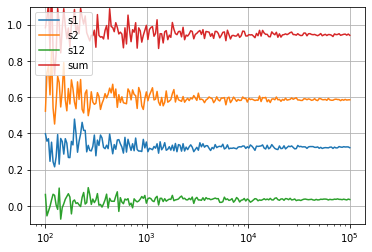

In [149]:
plt.semilogx(ns, s1sM, label='s1')
plt.semilogx(ns, s2sM, label='s2')
plt.semilogx(ns, s12sM, label='s12')
plt.semilogx(ns, sums_totalM, label='sum')
plt.legend()
plt.grid()
plt.ylim([-0.1, 1.1])